# \[Week5] 추천시스템  
## [캐글 데이터](https://www.kaggle.com/tmdb/tmdb-movie-metadata?select=tmdb_5000_movies.csv) tmdb_5000_movies.csv   
참고 사이트 : [[구름 Edu]](https://edu.goorm.io/learn/lecture/20671/%EB%94%A5%EB%9F%AC%EB%8B%9D-%EC%9D%B4%EB%A1%A0-%EB%B0%8F-%ED%8C%8C%EC%9D%B4%EC%8D%AC-%EC%8B%A4%EC%8A%B5)

#### 참고 사이트
- https://team-platform.tistory.com/34 <br/>
- https://wikidocs.net/22650

## 1. 자연어처리 - 문서 유사도 (용어 정리)

1. Bag of Words   

\[답변] 단어들의 순서는 전혀 고려하지 않고 단어들의 <b>출현빈도 (frequency)</b>에만 집중하는 텍스트 데이터의 수치화 표현

1) 문장 간의 유사도 구하는 방법 

\[답변] <br/>
1. 우선 각 단어에 고유한 정수 인덱스를 부여합니다 <br/>
2. 각 인덱스의 위치에 단어 토큰의 등장 횟수를 기록한 벡터를 만듭니다 <br/>

2) 단점

\[답변] <br/>
<b>1. Sparity</b><br/>
    단어의 갯수가 많아질 경우 학습량은 많아지고 컴퓨터 resource도 상당히 많이 사용되게 된다 <br/>
<b>2. 빈번한 단어는 더 많은 힘을 가진다</b><br/>
    많이 출현한 단어는 힘이 세진다. 만약 의미 없는 단어들이 많이 사용되었다면 우리가 원하는 결과를 얻기는 어려울 것이다<br/>
<b>3. Out of vocabulary</b><br/>
    오타, 줄임말 등의 단어들이 포함되면 굉장히 난감해진다<br/>
<b>4. 단어의 순서가 무시됨</b><br/>
    단어의 출현 횟수만 셀 수 있고 단어의 순서는 완전히 무시된다. 단어의 순서가 무시된다는 것은 단른 의미가 가진 동일한 결과로 해석될 수 있다 <br/>
    -> n-gram으로 해결할 수 있다

2. n-그램

\[답변]  BOW를 조금 더 개선하여 단어 하나만을 보는 것이 아니라 주변의 n개 단어를 뭉쳐서 보는 것이다. <br/>
뭉쳐진 n개 단어들을 gram이라고 한다. 단어 개수를 따라 부르는 명칭이 다른데 2개의 단어를 묶어서 사용하면 <br/>bi-gram이라고 한다

**(예제) fine thank you**  
1) 1-gram

    1-1) Word level  

    [답변]  [ fine, thank, you ]

    1-2) Character level

    [답변]  [ f, i, n, e, , t, h, a, n, k,  , y, o, u ]

2) 2-gram

    2-1) Word level

    [답변]  [ fine thank, thank you ]

    2-2) Character level 

    [답변] [ fi, in, ne, e ,  t, th, ha, an nk, k ,  y, yo, ou ]

3) 3-gram

    3-1) Word level 

    [답변] [ fine thank you ]

    3-2) Character level 

    [답변] [ fin, ine,  ne,  e t,  th, han, ank,  nk, kny,  yo, you ]

4) n-gram 사용하는 이유?  

\[답변] 임의의 개수를 정하기 위한 기준을 위해 사용되는 것

3. 점 A(3,4), 점 B(4,3)의 cosine 유사도를 구하시오.  

\[답변]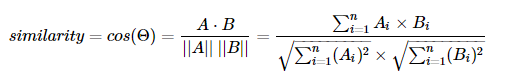

similarity = (3 * 4) + (4 * 3) / 5 * 5 = 0.96

## 2. 추천시스템  
### 아래 코드에서 pass 부분을 지우고 그 자리에 코드 작성해주세요

### 0. 추천시스템 종류 정리

1. Content-based filtering  

\[답변] <br/>컨텐츠 기반 필터링 방식은 사용자가 특정 아이템을 선호하는 경우, 그 아이템과 비슷한 콘텐츠를 가진 다른 아이템을 추천하는 방식

2. Collaborative filtering  

\[답변]<br/>
많은 사용자들로부터 얻은 기호 정보 (taste information)에 따라 사용자들의 관심사들을 자동적으로 예측하게 해주는 방법

    - user-based collaborative filtering  

    [답변]<br/>
    두 사용자가 얼마나 유사한 항목 (아이템) 을 선호했는지를 기준으로 한다

    - item-based collaborative filtering  

    [답변]
    아이템 기반 필터링은 협업 필터링의 또 다른 방법으로서 사용자들 대신에 평가된 아이템이 parameter로 사용된다. 아이템 기반 협동적 필터링은 대부분의 사람들이 과거에 자신이 좋아했던 상품과 비슷한 상품이 면 좋아하는 경향이 있고 반대로 싫어했었던 상품과 비슷한 상품이면 싫어하는 경향이 있다.

Content-based filtering을 해봅시다.  
보통은 장르를 기준으로 많이 하지만, 자연어처리에 좀 더 익숙해지기 위해서 줄거리를 바탕으로 해보겠습니다.  
Collaborative filtering도 한번 직접 해보세요. 재밌습니다:)

### 1. CSV 파일 불러와 DataFrame으로 저장

In [1]:
import pandas as pd
movies = pd.read_csv('./tmdb_5000_movies.csv')         # tmdb_5000_movies.csv dataframe으로 읽어오기
movies = movies[["original_title", "overview"]]
movies["overview"] = movies["overview"].astype("str")
movies

,original_title,overview
0,Avatar,"In the 22nd century, a paraplegic Marine is di..."
1,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha..."
2,Spectre,A cryptic message from Bond’s past sends him o...
3,The Dark Knight Rises,Following the death of District Attorney Harve...
4,John Carter,"John Carter is a war-weary, former military ca..."
...,...,...
4798,El Mariachi,El Mariachi just wants to play his guitar and ...
4799,Newlyweds,A newlywed couple's honeymoon is upended by th...
4800,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic..."
4801,Shanghai Calling,When ambitious New York attorney Sam is sent t...


### 2. 전처리  
출력 예시)

    original_title    0
    overview          3
    dtype: int64


In [3]:
# null 값 개수 확인
movies.isnull().sum()

original_title    0
overview          0
dtype: int64

1) 줄거리가 NaN인 **영화** drop

In [4]:
movies.dropna()

,original_title,overview
0,Avatar,"In the 22nd century, a paraplegic Marine is di..."
1,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha..."
2,Spectre,A cryptic message from Bond’s past sends him o...
3,The Dark Knight Rises,Following the death of District Attorney Harve...
4,John Carter,"John Carter is a war-weary, former military ca..."
...,...,...
4798,El Mariachi,El Mariachi just wants to play his guitar and ...
4799,Newlyweds,A newlywed couple's honeymoon is upended by th...
4800,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic..."
4801,Shanghai Calling,When ambitious New York attorney Sam is sent t...


2) "overview" column 모두 소문자로, 문자+숫자(\w)만 남기고 나머지는 띄어쓰기로 대체

In [8]:
import re
# 되도록 apply, lambda 사용할것!
movies["overview"].map(lambda x : re.sub("\W", " ", x.lower()))

0       in the 22nd century  a paraplegic marine is di...
1       captain barbossa  long believed to be dead  ha...
2       a cryptic message from bond s past sends him o...
3       following the death of district attorney harve...
4       john carter is a war weary  former military ca...
                              ...                        
4798    el mariachi just wants to play his guitar and ...
4799    a newlywed couple s honeymoon is upended by th...
4800     signed  sealed  delivered  introduces a dedic...
4801    when ambitious new york attorney sam is sent t...
4802    ever since the second grade when he first saw ...
Name: overview, Length: 4803, dtype: object

### 3. TF-IDF 계산

1) TF 란?  

\[답변]<br/>
단어의 빈도와 역 문서 빈도 ( 문서의 빈도에 특정 식을 취하기 )를 사용하여 DTM내의 각 단어들마다 중요한 정도를 가중치로 주는 방법<br>
- 참조 사이트 : https://wikidocs.net/31698

2) DF 란?  

\[답변] Document Frequency 문서의 빈도 <br>
- df(t) : 특정 단어 t가 등장한 문서의 수

3) IDF 란?   

\[답변] Inverse Document Frequency 역문서의 빈도 <br>
- idf(d, t) : df(t)에 반비례하는 수

라이브러리로 적용해보자...

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
# ngram_range=(1, 2) 는 단어를 1개 혹은 2개 연속으로 보겠다
tfidf_vec = TfidfVectorizer(ngram_range = (1,2))                    # Vectorizer 생성
tfidf_matrix = tfidf_vec.fit(movies['overview'])       # Vectorizer가 단어들을 학습
tfidf_matrix=tfidf_matrix.transform(movies['overview'])
print(tfidf_matrix)

  (0, 143181)	0.1822949711785075
  (0, 143166)	0.12906474179221614
  (0, 139437)	0.14047981811804228
  (0, 139433)	0.12752678380266755
  (0, 138768)	0.06618828500945466
  (0, 137192)	0.02641445634812997
  (0, 131980)	0.15352529328031897
  (0, 129618)	0.1679101322294132
  (0, 129543)	0.04760987963827537
  (0, 106294)	0.1822949711785075
  (0, 106293)	0.1419116227517618
  (0, 100430)	0.1822949711785075
  (0, 100429)	0.1822949711785075
  (0, 100297)	0.1822949711785075
  (0, 100295)	0.15629646170085604
  (0, 98402)	0.1822949711785075
  (0, 98401)	0.13557405697928934
  (0, 97312)	0.1738803798143742
  (0, 96794)	0.044647797226998215
  (0, 87805)	0.1822949711785075
  (0, 87794)	0.14511070191618572
  (0, 87041)	0.1679101322294132
  (0, 87032)	0.09503525512293091
  (0, 83715)	0.1822949711785075
  (0, 83707)	0.1378823154458084
  :	:
  (4802, 35453)	0.08733029329479698
  (4802, 35452)	0.08733029329479698
  (4802, 34395)	0.11218160282074556
  (4802, 34373)	0.07847807823260804
  (4802, 33199)	0.0929

** fit() / transform() 의 차이 <br/>
사이트 : https://www.inflearn.com/questions/19038

### 4. 영화 간 **cosine 유사도**  
\[출력예시]  

    ### COSINE Similarity ###
    [[1.         0.01513636 0.00614044 ... 0.01195144 0.00571986 0.00630023]
    [0.01513636 1.         0.01307772 ... 0.01768395 0.00997186 0.00666392]
    [0.00614044 0.01307772 1.         ... 0.01288316 0.00565125 0.00612543]
    ...
    [0.01195144 0.01768395 0.01288316 ... 1.         0.01532266 0.0089986 ]
    [0.00571986 0.00997186 0.00565125 ... 0.01532266 1.         0.01649368]
    [0.00630023 0.00666392 0.00612543 ... 0.0089986  0.01649368 1.        ]]
    [[   0 3603  634 ... 2852 3945 3386]
    ### 유사도 기준 index 정렬 ###
    [[   0 3603  634 ... 2852 3945 3386]
    [   1 2379 2542 ... 3487 3622 3945]
    [   2 1343 3161 ... 3534 3637 3082]
    ...
    [4797 4033  569 ... 2604 3685 1658]
    [4798 2017 1480 ... 2108 1658 4511]
    [4799 2586  868 ... 3987 2192  669]]



In [27]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
plot_similarity = cosine_similarity(tfidf_matrix, tfidf_matrix)
# 줄거리 간 cosine 유사도 구하기 - tfidf_matrix 사용
print("### COSINE Similarity ###")
print(plot_similarity)
similar_index = np.argsort(-plot_similarity)         # 유사도 높은 순서대로 index 정렬
print("### 유사도 기준 index 정렬 ###") 
print(similar_index)

### COSINE Similarity ###
[[1.         0.01514413 0.00614504 ... 0.01195829 0.00572386 0.006304  ]
 [0.01514413 1.         0.01308527 ... 0.0176922  0.00997908 0.00666831]
 [0.00614504 0.01308527 1.         ... 0.01289    0.00565554 0.00612954]
 ...
 [0.01195829 0.0176922  0.01289    ... 1.         0.01532978 0.00900306]
 [0.00572386 0.00997908 0.00565554 ... 0.01532978 1.         0.01649947]
 [0.006304   0.00666831 0.00612954 ... 0.00900306 0.01649947 1.        ]]
### 유사도 기준 index 정렬 ###
[[   0 3604  634 ... 4140 2596 2669]
 [   1 2379 2542 ...  161 2656 4458]
 [   2 1343 3162 ... 4144 4148 4180]
 ...
 [4800 4034  569 ... 2853 4140 1038]
 [4801 2017 1480 ... 4140 4458 2108]
 [4802 2586  868 ... 3988 4513 3152]]


In [44]:
input_movie = "Avatar"   
movie_index = movies[movies['original_title']==input_movie].index.values
similar_index[movie_index,:10]

array([[   0, 3604,  634,  529, 1013,  775, 2130, 2628, 1341, 2808]],
      dtype=int64)

In [45]:
input_movie = "Avatar"          # data에 있는 영화의 제목을 넣어야 합니다.

movie_index = movies[movies['original_title']==input_movie].index.values    # input_movie에 해당하는 index 값 가져오기
similar_movies = similar_index[movie_index,:10]          # 유사도 상위 10개 index 가져오기
# 인덱스로 사용하기 위해서는 1차원으로 변형
similar_movies_index = similar_movies.reshape(-1,)            # similar_movies 1차원 변형
display(movies.iloc[similar_movies_index])

,original_title,overview
0,Avatar,"In the 22nd century, a paraplegic Marine is di..."
3604,Apollo 18,"Officially, Apollo 17 was the last manned miss..."
634,The Matrix,"Set in the 22nd century, The Matrix tells the ..."
529,Tears of the Sun,Navy SEAL Lieutenant A.K. Waters and his elite...
1013,Child 44,"Set in Stalin-era Soviet Union, a disgraced MG..."
775,Supernova,"Set in the 22nd century, when a battered salva..."
2130,The American,Dispatched to a small Italian town to await fu...
2628,Blood and Chocolate,A young teenage werewolf is torn between honor...
1341,Obitaemyy Ostrov,"On the threshold of 22nd century, furrowing th..."
2808,The Exorcist,12-year-old Regan MacNeil begins to adapt an e...


3주동안의 자연어처리 스터디가 끝났습니다. 다음주부터는 이미지처리 스터디가 시작됩니다.  
짧은 기간이라 많은 부분을 다루지는 못했지만, 추후에 프로젝트를 진행하면서 멤버들끼리 딥러닝 등 심화 부분을 공부하시면 더 좋을 것 같습니다.  
중간에 시험기간도 겹쳐서 바쁜 와중에도 과제 잘 해주셔서 감사합니다!